In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

LOO COMPARISON

In [2]:
# leave one-out comparison
# load data
df_reg     = pd.read_csv('../model_validation/regression/loo/df_mean_runs.csv', index_col=0)
df_reg_std = pd.read_csv('../model_validation/regression/loo/df_std_runs.csv', index_col=0)


df_reg.columns

Index(['Model', 'Feature', 'TOP-1', 'TOP-2', 'TOP-3', 'TOP-5', 'TOP-AVG'], dtype='object')

In [3]:
def make_regression_table(df_reg, df_reg_std, cutoff_top1=70, cutoff_top_avg=2, 
                          discard_rf2=True, sort_by='TOP-AVG'):  
    max_elements = 20 
    round_ = 2
    df_reg.rename(columns={'TOP1': 'TOP-1', 'TOP2': 'TOP-2', 'TOP3': 'TOP-3', 'TOP5': 'TOP-5', 'TOPAVG': 'TOP-AVG', 'Feature': 'Descriptor'}, inplace=True)
    df_reg_std.rename(columns={'TOP1': 'TOP-1', 'TOP2': 'TOP-2', 'TOP3': 'TOP-3', 'TOP5': 'TOP-5', 'TOPAVG': 'TOP-AVG', 'Feature': 'Descriptor'}, inplace=True)
    # report models with performance above 70%
    sel = df_reg[df_reg['TOP-1'] >= cutoff_top1]
    sel = sel[sel['TOP-AVG'] <= cutoff_top_avg]
    if discard_rf2:
        sel = sel[sel.Model != 'RF2']

    std = df_reg_std.copy()
     
    print(len(sel))

    # rename index:
    desc_rename = {'BDE': 'bde', 
     'XTB': 'xtb', 
     'DBSTEP': 'steric-dstep', 
     'Gasteiger': 'charges-gasteiger', 
     'ENV-1': 'env.', 
     'ENV-1-OHE': 'env.-ohe',
     'ENV-2': 'env-steric-charges(aimnet)',
     'Rdkit-Vbur': 'steric-rdkit',
     'Selected': 'ML-selected', 
     'Custom': 'Chemist-selected'}
    
    models_rename = {'LR': 'LR', 
                     'RF-OPT-XTB': 'RF-1', 
                     'RF2' : 'RF-2', 
                     'SVR' : 'SVR', 
                     'KNN' : 'k-NN',
                     'GPR' : 'GP',
                     'MLP2': 'MLP-2', 
                     'MLP' : 'MLP-1'}
    
    #sel['Model'] = sel['Model'].map(models_rename)
    #sel['Descriptor'] = sel['Descriptor'].map(desc_rename)
    #std['Model'] = std['Model'].map(models_rename)
    #std['Descriptor'] = std['Descriptor'].map(desc_rename)
    # selected special examples:
    sel.set_index(['Model', 'Descriptor'], inplace=True)
    std.set_index(['Model', 'Descriptor'], inplace=True)
    
    
    if sort_by == 'TOP-AVG':
        asc = True
    else:
        asc = False
    sel.sort_values(by=sort_by, ascending=asc, inplace=True)

    sel = sel.head(max_elements)
    #df_reg_sel = df_reg_sel[[]]
    annots    = pd.DataFrame(columns=sel.columns, index=sel.index)
    
    for i in annots.index:
        for j in annots.columns:
            annots.loc[i,j] = f"{round(sel.loc[i,j], round_)} ± {round(std.loc[i,j], round_)}"
    
    fig, ax = plt.subplots(figsize=(10, 10))
    sns.heatmap(data  = sel,
                    fmt   = '',
                    annot = annots, 
                    cmap  = "viridis",
                    vmin  = 50, vmax=100,
                    ax = ax)
    ax.xaxis.set_label_position('top')  # Set x-axis label position to the top
    ax.xaxis.tick_top()
    plt.show()
    return sel, std

37


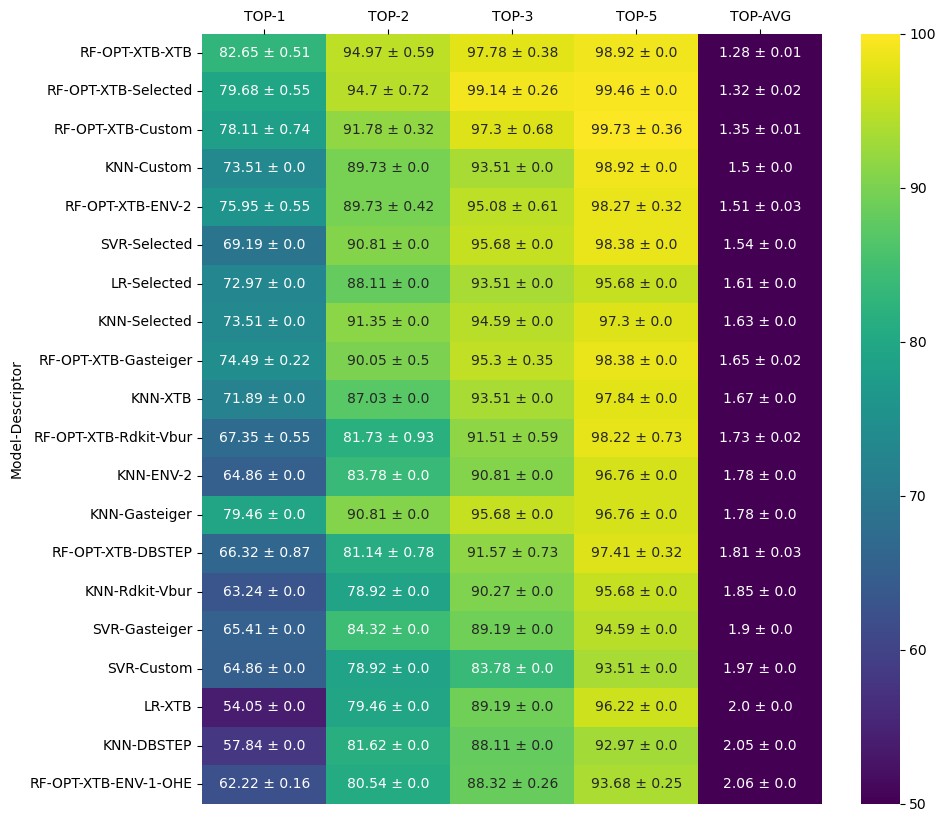

In [4]:
d, d_std = make_regression_table(df_reg, df_reg_std, cutoff_top1=50, cutoff_top_avg=2.5)

LARGE MOL COMPARISON

In [5]:
# load data
df_reg_lm     = pd.read_csv('../model_validation/regression/large_mol/df_mean_runs.csv', index_col=0)
for i in df_reg_lm.index:
    for j in df_reg_lm.columns:
        if j in ['TOP1', 'TOP2', 'TOP3', 'TOP5', 'TOP-1', 'TOP-2', 'TOP-3', 'TOP-5']:
            df_reg_lm.loc[i,j] = df_reg_lm.loc[i,j]*100/50

df_reg_std_lm = pd.read_csv('../model_validation/regression/large_mol/df_std_runs.csv', index_col=0)
for i in df_reg_std_lm.index:
    for j in df_reg_std_lm.columns:
        if j in ['TOP1', 'TOP2', 'TOP3', 'TOP5', 'TOP-1', 'TOP-2', 'TOP-3', 'TOP-5']:
            df_reg_std_lm.loc[i,j] = df_reg_std_lm.loc[i,j]*100/50


25


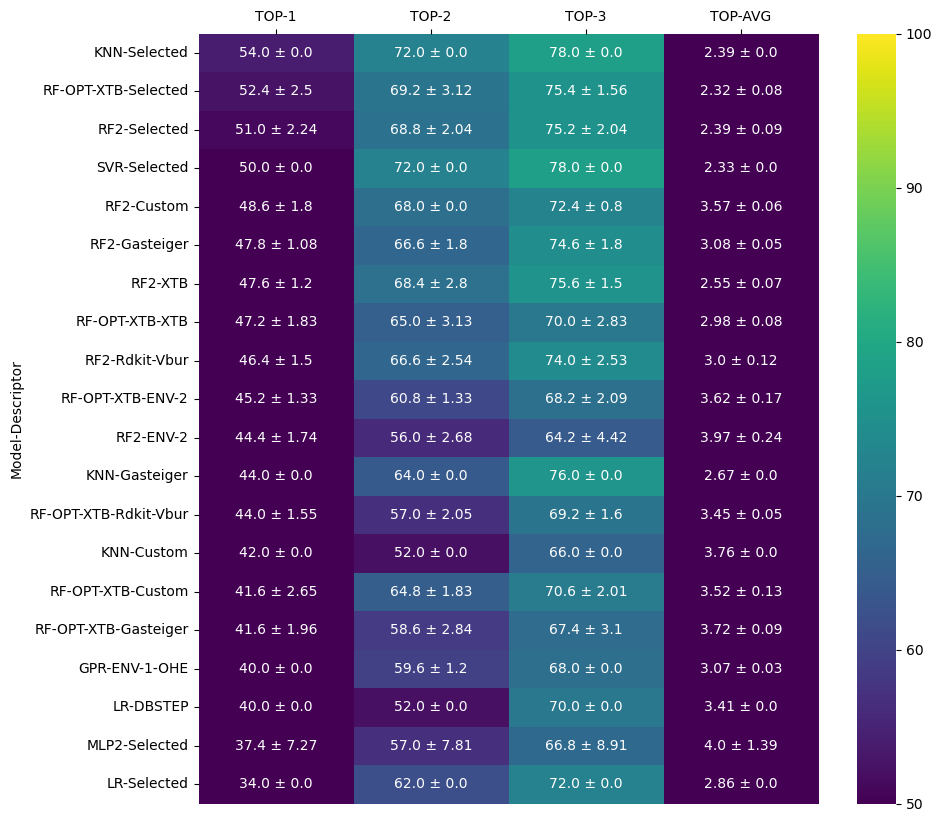

In [6]:
d, d_std = make_regression_table(df_reg_lm, df_reg_std_lm, cutoff_top1=30, cutoff_top_avg=4, 
                                 discard_rf2=False, sort_by='TOP-1')